### 데이터 확인 작업

In [1]:
#기본 패키지 세팅 ~머신러닝까지 (복붙하고 시작하기)   ============================

import numpy as np #수치연산, 선형대수, ndarray라는 자료 구조를 가진 패키지
import pandas as pd #Series, DF 자료구조, 기술통계, 간단한 시각화를 가진 패키지
import seaborn as sns #샘플데이터와 시각화
import matplotlib.pyplot as plt #그래프 그리기 패키지
#그래프의 음수 사용을 위한 설정
plt.rcParams['axes.unicode_minus'] = False

#그래프 한글처리 패키지
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows': #윈도우즈라면
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin': #매킨토시(MacOS)라면
    rc('font', family='AppleGothic')

from sklearn import preprocessing #데이터 전처리 패키지
#sklearn : 데이터셋, 전처리, 머신러닝용 패키지

#지도 시각화 패키지
import folium

#수학 관련 패키지
import math

<b>기본 패키지 셋팅</b> 그냥 복붙해서 쓰자

### 파일 불러오기, 데이터 확인

In [49]:
# 캐글에서 다운로드 하면 3개의 파일이 압축되어 있다. 
# 메인이 되는 train을 불러와보자
train = pd.read_csv('C:/Users/admin/Downloads/titanic/train.csv')
train.info()

print(" ")

test = pd.read_csv('C:/Users/admin/Downloads/titanic/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

<b>test</b>와 <b>train</b>데이터의 차이를 보니 <b>test</b>에만 <b>Survived</b>가 없다.
예측해서 새로 넣어주어야 하는 것으로 생각된다.

데이터 변수는
<b>PassengerId</b> 승객 번호 </n>
<b>Pclass</b> 객실 등급
<b>Name</b> 이름
<b>Sex</b> 성별
<b>Age</b> 나이


### 기술 통계 확인

In [3]:
train[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


<b>Continuous</b> 변인의 기술 통계 값을 보았다.

#### 결측치 확인

In [4]:
print(train.isna().sum())
#age에 177개. Cabin에 687개. embarked에 2개 결측치 확인

print("")

print(test.isna().sum())
#age의 86개 결측치. Fare1개. Cabin에 1개 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### 탐색적 분석

In [5]:
train_nona = train[['Survived','Pclass','Sex','Age','SibSp','Parch']]
train_nona = train_nona.dropna()
train_nona

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [6]:
train_nona = train_nona.replace({'male':'1','female':2})

x = train_nona[['Pclass','Sex','Age','SibSp']]
y = train_nona[['Survived']]

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x,y)
print(log.score(x,y))

#'Pclass','Age','Sex','SibSp','Parch' = 80.95
#'Pclass','Age','Sex','SibSp' = 0.81 ★
# 'Pclass','Age','Sex' = 0.79
# 'Pclass', 'Sex' = 0.78 *선실등급과 성별이 가장 주요한 생존 factor임을 파악.

0.8109243697478992


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### 결측치가 절반 이상이라면 삭제하기

In [7]:
train.dropna(thresh=(len(train)/2), axis=1, inplace=True)
train
# cabin이 삭제된걸 알 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Survived를 탐색적으로 알아보자

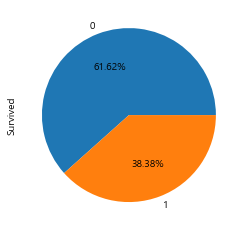

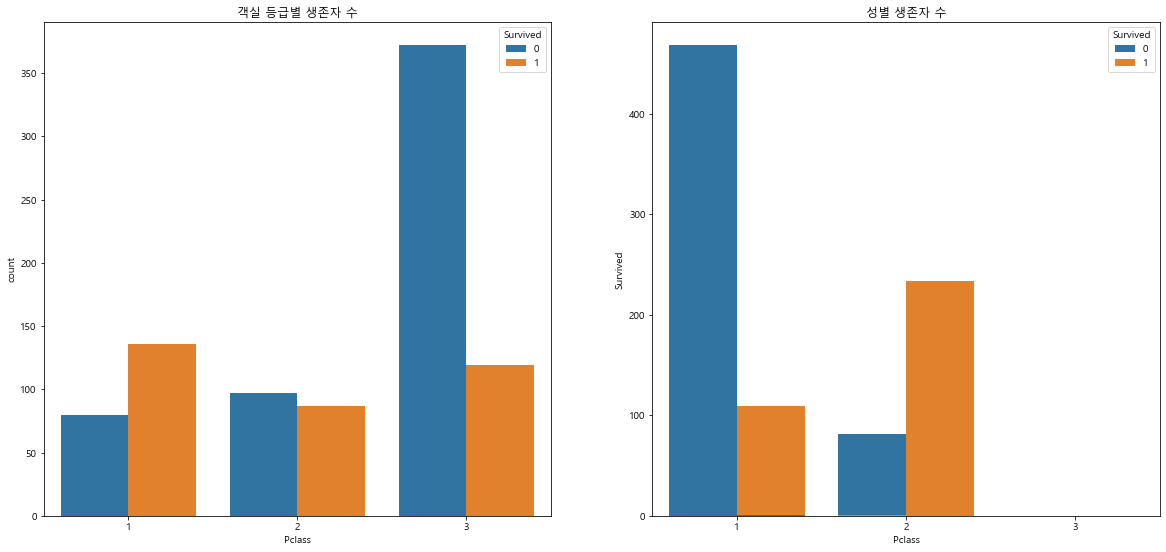

In [47]:
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(2, 2, 1) # 1행 4열 - 1번째 그래프
ax2 = fig.add_subplot(2, 2, 2) # 1행 4열 - 2번째 그래프

sns.countplot(x='Pclass', hue='Survived', data=train, ax=ax1)
ax1.set_title('객실 등급별 생존자 수')
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax2)
ax2.set_title('성별 생존자 수')
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

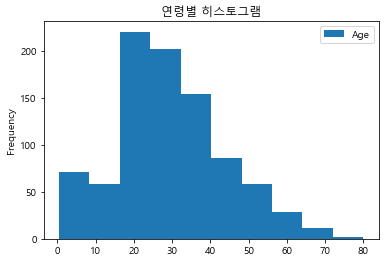

In [46]:
df_age = pd.DataFrame(train, columns = ['Age'])

age_hist = df_age.plot.hist(bins=10)
age_hist.set_title('연령별 히스토그램')
plt.show()

### 머신러닝으로 결측값 채우기 - 일단 fillna로 대체

In [43]:
# age를 추측하기 위해서 어떤 가중치를 줘야할까? 강력한 요인을 찾기 위해 다중회귀를 해보자
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

ndf = train[['Pclass', 'Survived', 'Age', 'Sex']]

ndf = ndf.dropna()
ndf = ndf.replace({'male':'1','female':'2'})

x = ndf[['Pclass']]
y = ndf['Age']
lr = LinearRegression() 
lr.fit(x,y)
print(lr.score(x,y)) #3개 다 = 0.19
#Pclass > Survived >sex 가중치가 Pclass가 그나마 큰 걸 확인

#Pclass에 가중치를 더 주어서 머신러닝으로 결측치 채우기 # (나중에)

train = train.fillna(method='ffill')
train

0.08477260365166872


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### 예측하는 모델을 만들어보자

In [42]:
# 랜덤포레스트 써보기

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=ndf[['Pclass', 'Age', 'Sex']]
y=ndf['Survived'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

forest = RandomForestClassifier(criterion='entropy',n_estimators=25,random_state=1,n_jobs=2)
forest.fit(X_train, y_train)
# test data를 가지고 y_hat을 예측 (분류)
y_hat = forest.predict(X_test)

from sklearn import metrics
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       174
           1       0.78      0.66      0.71        94

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268

